In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None # recordamos que este comando nos pe



## Pair Programming Normalización




En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:




Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.




Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [6]:
df=pd.read_csv("../datos/sephora_website_dataset2.csv")
df.head(2)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,rating_norm,rating_log,rating_raiz,rating_Sklearn
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,0.001996,1.386294,2.00000,NaN
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,0.101996,1.504077,2.12132,NaN


In [7]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer,rating_norm,rating_log,rating_raiz,rating_Sklearn
0,2218774,4.0,4,3002,66.0,75.0,1,0,0,0,0.001996,1.386294,2.000000,NaN
1,2044816,4.5,76,2700,66.0,66.0,1,0,0,0,0.101996,1.504077,2.121320,NaN
2,1417567,4.5,26,2600,180.0,180.0,1,0,0,0,0.101996,1.504077,2.121320,NaN
3,1417617,4.5,23,2900,120.0,120.0,1,0,0,0,0.101996,1.504077,2.121320,NaN
4,2218766,3.5,2,943,72.0,80.0,1,0,0,0,-0.098004,1.252763,1.870829,NaN


In [8]:
v_numericas = df.select_dtypes(include= ['int64', 'float64'] )

In [9]:
df_numericas = v_numericas[['rating', 'number_of_reviews', 'love', 'price', 'value_price']]

In [11]:
df_numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,9168.0,3.990020,1.007707,0.0,4.0,4.0,4.5,5.0
number_of_reviews,9168.0,282.139180,890.642028,0.0,10.0,46.0,210.0,19000.0
love,9168.0,16278.585079,42606.514471,0.0,1600.0,4800.0,13800.0,1300000.0
price,9168.0,50.063237,47.164989,2.0,24.0,35.0,59.0,549.0
value_price,9168.0,51.823590,49.459020,2.0,25.0,35.0,60.0,549.0


### Sklearn StandardScaler


In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()

Este método lo usaremos solo para las predictorias, necesitamos hacer un drop de nuestra variable respuesta, 'rating'

In [14]:
numericas.drop(['rating'], axis = 1, inplace = True)


¿Qué hace realmente el fit?

In [15]:
scaler.fit(numericas)

StandardScaler()

In [16]:
# transformamos los datos


X_escaladas = scaler.transform(numericas)

In [17]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,id,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer,rating_norm,rating_log,rating_raiz,rating_Sklearn
0,0.662837,-0.312308,-0.311626,0.337912,0.468624,1.805061,-0.60003,-0.318008,-0.018092,0.009905,0.093157,0.116885,NaN
1,0.212111,-0.231463,-0.318715,0.337912,0.286645,1.805061,-0.60003,-0.318008,-0.018092,0.506108,0.452684,0.393366,NaN


In [18]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna id es:  -1.3378865593432296e-16
La desviación estándar de la columna id es: 1.0000545419837321
-------------------------------------------------------------
La media de la columna number_of_reviews es:  -4.7524762872397764e-17
La desviación estándar de la columna number_of_reviews es: 1.0000545419837368
-------------------------------------------------------------
La media de la columna love es:  3.102278953408296e-16
La desviación estándar de la columna love es: 1.0000545419837383
-------------------------------------------------------------
La media de la columna price es:  -2.689446743467378e-16
La desviación estándar de la columna price es: 1.0000545419837361
-------------------------------------------------------------
La media de la columna value_price es:  4.513732319847925e-16
La desviación estándar de la columna value_price es: 1.000054541983733
-------------------------------------------------------------
La media de la columna online_only es:  6.046888

In [19]:
numericas_estandar.head(2)

,id,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer,rating_norm,rating_log,rating_raiz,rating_Sklearn
0,0.662837,-0.312308,-0.311626,0.337912,0.468624,1.805061,-0.60003,-0.318008,-0.018092,0.009905,0.093157,0.116885,NaN
1,0.212111,-0.231463,-0.318715,0.337912,0.286645,1.805061,-0.60003,-0.318008,-0.018092,0.506108,0.452684,0.393366,NaN


In [20]:
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9168.0,-1.337887e-16,1.000055,-5.085892,-0.371806,2.834606e-01,0.693455,1.027939
number_of_reviews,9168.0,-4.752476e-17,1.000055,-0.316799,-0.305571,-2.651481e-01,-0.081001,21.017290
love,9168.0,3.102279e-16,1.000055,-0.382089,-0.344534,-2.694238e-01,-0.058177,30.131341
price,9168.0,-2.689447e-16,1.000055,-1.019100,-0.552627,-3.193907e-01,0.189489,10.579118
value_price,9168.0,4.513732e-16,1.000055,-1.007426,-0.542369,-3.401707e-01,0.165326,10.052838
online_only,9168.0,6.046889e-16,1.000055,-0.553998,-0.553998,-5.539980e-01,-0.553998,1.805061
exclusive,9168.0,9.700937e-15,1.000055,-0.600030,-0.600030,-6.000297e-01,1.666584,1.666584
limited_edition,9168.0,2.429206e-15,1.000055,-0.318008,-0.318008,-3.180079e-01,-0.318008,3.144576
limited_time_offer,9168.0,6.077822e-16,1.000055,-0.018092,-0.018092,-1.809233e-02,-0.018092,55.272054
rating_norm,9168.0,-2.403643e-15,1.000055,-3.959721,0.009905,9.904580e-03,0.506108,1.002311


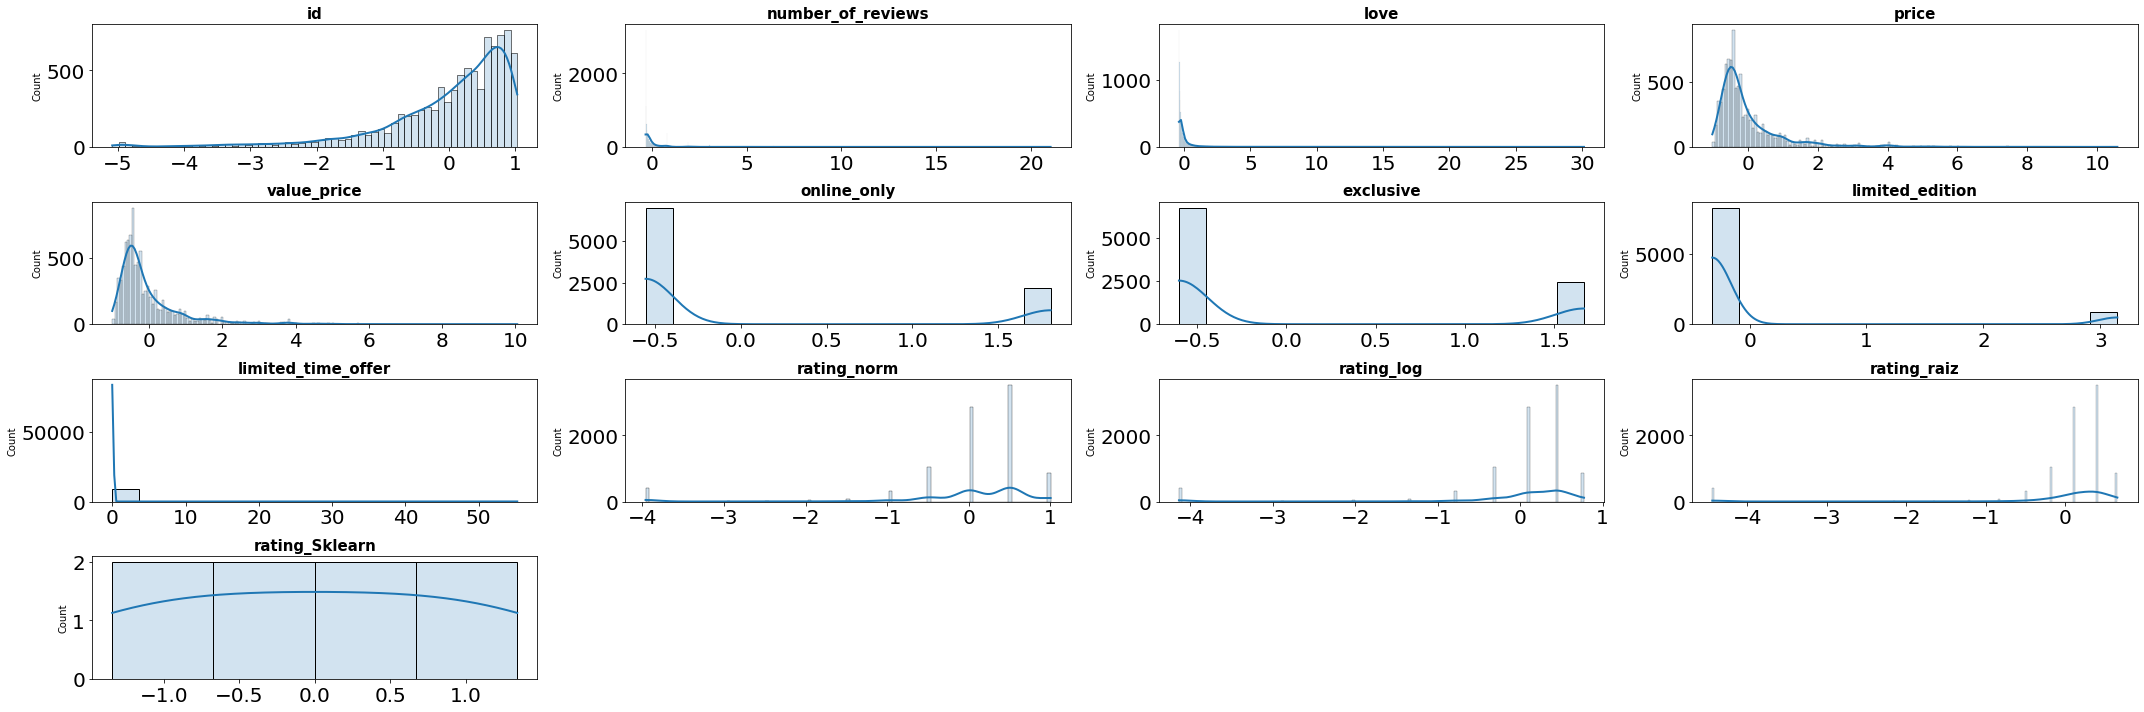

In [21]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 10))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

# si ejecutamos el código anterior sin incluir las siguientes líneas de código veremos que nos quedan tres gráficas vacías, para evitar verlas incluimos las siguientes líneas
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3])


### Sklearn RobustScaler


In [22]:
from sklearn.preprocessing import RobustScaler

In [23]:
# construir el modelo de escalador
robust = RobustScaler()

In [24]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [25]:
# transformamos los datos
X_robust = robust.transform(numericas)

In [26]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,id,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer,rating_norm,rating_log,rating_raiz,rating_Sklearn
0,0.356135,-0.21,-0.147377,0.885714,1.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,-0.066979,0.15,-0.172131,0.885714,0.885714,1.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN


In [27]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna id es:  -0.2660948761852737
La desviación estándar de la columna id es: 0.9387878544450533
-------------------------------------------------------------
La media de la columna number_of_reviews es:  1.18069589877839
La desviación estándar de la columna number_of_reviews es: 4.453210142439349
-------------------------------------------------------------
La media de la columna love es:  0.9408676293880402
La desviación estándar de la columna love es: 3.4923372517101483
-------------------------------------------------------------
La media de la columna price es:  0.43037820992271564
La desviación estándar de la columna price es: 1.34757111650916
-------------------------------------------------------------
La media de la columna value_price es:  0.48067399027674124
La desviación estándar de la columna value_price es: 1.413114864490888
-------------------------------------------------------------
La media de la columna online_only es:  0.23483856893542757
La desviac

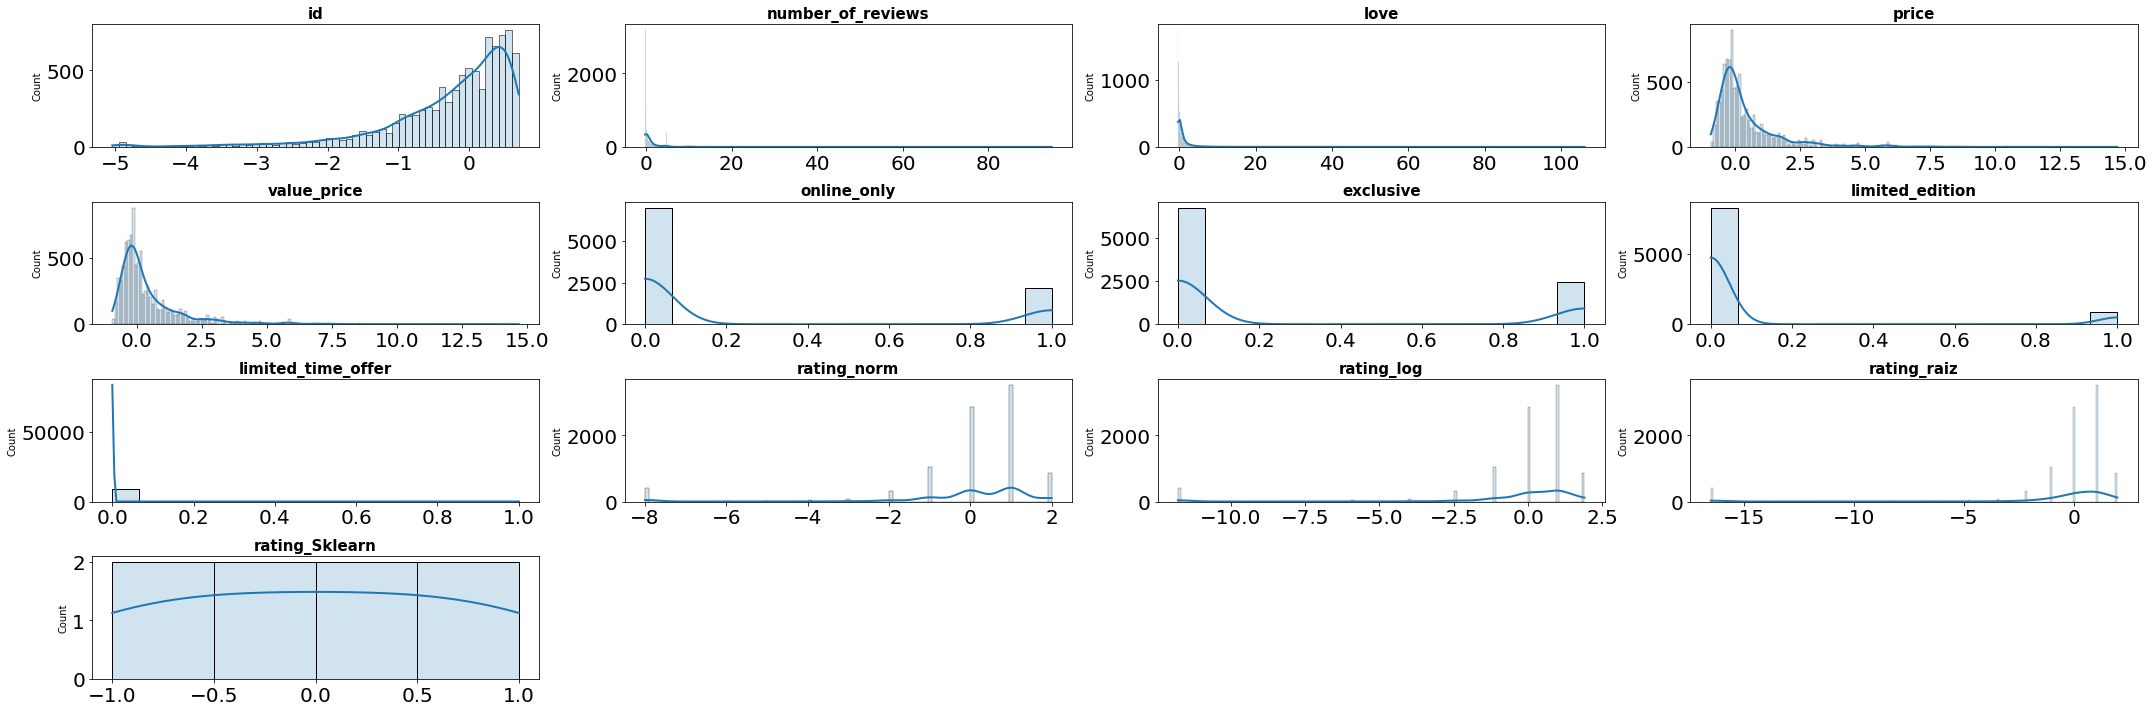

In [28]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3])